In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('Solarize_Light2')
%matplotlib inline

In [3]:
df = pd.read_csv('SMSSpamCollection.csv', index_col=0)

In [4]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\r\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.describe()

,target,sms
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later\r\n"
freq,4827,30


In [6]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4827   4518                         Sorry, I'll call later\r\n   30
spam     747    653  Please call our customer service representativ...    4

In [7]:
df['length'] = df['sms'].apply(len)

In [8]:
df.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",113
1,ham,Ok lar... Joking wif u oni...\r\n,31
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,157
3,ham,U dun say so early hor... U c already then say...,51
4,ham,"Nah I don't think he goes to usf, he lives aro...",63


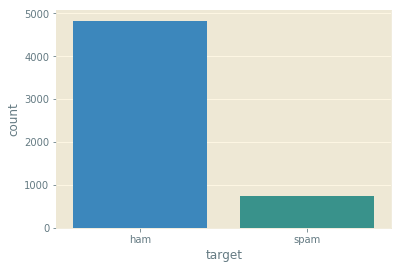

In [9]:
sns.countplot(x='target', data=df)

In [10]:
spam, text, length = df.sample().iloc[0]
print(spam)
text

spam


'sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? THIS MSG IS FREE RECD MSGS 150P INC VAT 2 CANCEL TEXT STOP\r\n'

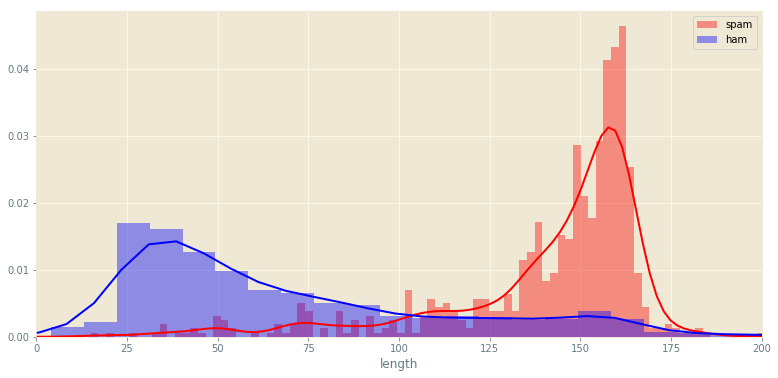

In [11]:
plt.figure(figsize=(13,6))
sns.distplot(df[df['target'] == 'spam']['length'], bins=100, color='red')
sns.distplot(df[df['target'] == 'ham']['length'], bins=100, color='blue')
plt.xlim(0, 200)
plt.legend(['spam', 'ham'])

In [12]:
df['length'].describe()

count    5574.000000
mean       82.604593
std        59.919970
min         4.000000
25%        38.000000
50%        64.000000
75%       124.000000
max       912.000000
Name: length, dtype: float64

In [14]:
df[df['length'] == 912]['sms'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..\r\n"

In [17]:
df['target'] = df['target'].map({'ham':0, 'spam':1})

In [18]:
df.head()

,target,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",113
1,0,Ok lar... Joking wif u oni...\r\n,31
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,157
3,0,U dun say so early hor... U c already then say...,51
4,0,"Nah I don't think he goes to usf, he lives aro...",63


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer(
                strip_accents='unicode',
                stop_words='english',
                ngram_range=(1, 1))

In [74]:
tfidf.fit(df['sms'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [75]:
X = tfidf.transform(df['sms'].values)

In [76]:
X

<5574x8481 sparse matrix of type '<class 'numpy.float64'>'
	with 43778 stored elements in Compressed Sparse Row format>

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, df['target'].values, test_size=0.2, random_state=42)

In [110]:
X_train

<4459x8481 sparse matrix of type '<class 'numpy.float64'>'
	with 34875 stored elements in Compressed Sparse Row format>

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr = LogisticRegression()

In [113]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, lr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       954
          1       0.98      0.68      0.81       161

avg / total       0.95      0.95      0.95      1115



In [116]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [117]:
nb = MultinomialNB()

In [118]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [119]:
print(classification_report(y_test, nb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       954
          1       1.00      0.81      0.90       161

avg / total       0.97      0.97      0.97      1115



In [120]:
gnb = GaussianNB()

In [121]:
gnb.fit(X_train.todense(), y_train)

GaussianNB(priors=None)

In [122]:
print(classification_report(y_test, gnb.predict(X_test.todense())))

             precision    recall  f1-score   support

          0       0.98      0.88      0.93       954
          1       0.57      0.92      0.70       161

avg / total       0.92      0.89      0.90      1115



In [123]:
from sklearn.decomposition import TruncatedSVD

In [124]:
svd = TruncatedSVD(n_components=100)

In [125]:
svd.fit(X_train)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=None, tol=0.0)

In [126]:
X_train = svd.transform(X_train)
X_test = svd.transform(X_test)

In [127]:
lr = LogisticRegression()

In [128]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, lr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96       954
          1       0.97      0.57      0.71       161

avg / total       0.94      0.93      0.93      1115



In [131]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [132]:
nb = MultinomialNB()

In [133]:
nb.fit(X_train, y_train)

ValueError: Input X must be non-negative

In [134]:
print(classification_report(y_test, nb.predict(X_test)))

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [135]:
gnb = GaussianNB()

In [106]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [107]:
print(classification_report(y_test, gnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.86      0.91       954
          1       0.50      0.81      0.62       161

avg / total       0.90      0.86      0.87      1115



# Pipeline

In [136]:
from sklearn.pipeline import Pipeline

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'].values, df['target'].values, test_size=0.2, random_state=42)

In [137]:
tfidf = TfidfVectorizer(strip_accents='unicode')
lr = LogisticRegression()

In [139]:
my_steps = [('vect', tfidf), ('clf', lr)]

In [140]:
tf_lr = Pipeline(steps=my_steps)

In [144]:
tf_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [145]:
print(classification_report(y_test, tf_lr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       954
          1       0.99      0.81      0.89       161

avg / total       0.97      0.97      0.97      1115



# GridSearch

In [155]:
params= {'vect__ngram_range':[(1, 1), (2, 2)],
         'vect__stop_words':[None, 'english'],
         'vect__min_df':[1, 0.01],
         'vect__sublinear_tf':[True, False],
         'vect__use_idf':[True, False],
         'clf__C':[0.1, 1.0, 10.0, 100.0],
         'clf__penalty':['l1', 'l2']}

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
gs = GridSearchCV(tf_lr, param_grid=params, scoring='roc_auc', cv=3, verbose=1, n_jobs=2)

In [158]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   28.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 768 out of 768 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'vect__ngram_range': [(1, 1), (2, 2)], 'vect__stop_words': [None, 'english'], 'vect__min_df': [1, 0.01], 'vect__sublinear_tf': [True, False], 'vect__use_idf': [True, False], 'clf__C': [0.1, 1.0, 10.0, 100.0], 'clf__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [159]:
print(classification_report(y_test, gs.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       954
          1       0.98      0.89      0.94       161

avg / total       0.98      0.98      0.98      1115



In [160]:
gs.best_score_

0.992848877483512

In [161]:
gs.best_params_

{'clf__C': 10.0,
 'clf__penalty': 'l2',
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None,
 'vect__sublinear_tf': True,
 'vect__use_idf': True}

In [162]:
from sklearn.externals import joblib

In [163]:
joblib.dump(gs, 'sms_spam_class.pkl')

['sms_spam_class.pkl']

In [164]:
loaded_gs = joblib.load('sms_spam_class.pkl')

In [165]:
print(classification_report(y_test, loaded_gs.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       954
          1       0.98      0.89      0.94       161

avg / total       0.98      0.98      0.98      1115

